In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12,6]

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amandeepsingh1111/Clustering/master/Data/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Subsetting the dataset
X = dataset.iloc[:,2:5].values

In [5]:
# subsetted dataset Structure
print(X.shape)
X[:5]

(200, 3)


array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

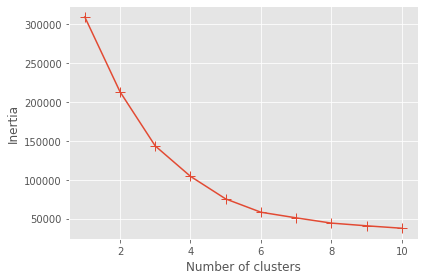

In [6]:
inertiaValue = []

# iteration for calculate inertia used for identifying correct number of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random', 
                random_state=0)
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker = '+',markersize=10,)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=200)
plt.show()

## Using above graph deciding optimal number of clusters

In [7]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=5,  
            random_state=3)

In [8]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Inertia: 75378.76464074483


In [9]:
dataset['PredictedClusterID']=predictedCluster
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PredictedClusterID
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
5,6,Female,22,17,76,4
6,7,Female,35,18,6,2
7,8,Female,23,18,94,4
8,9,Male,64,19,3,2
9,10,Female,30,19,72,4


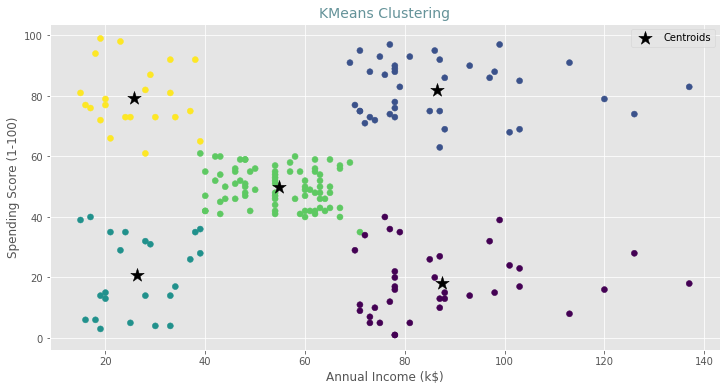

In [10]:
# create scatter plot to visualize the data
%matplotlib inline
plt.figure(figsize=(12,6))
plt.scatter(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], c=dataset['PredictedClusterID'])
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s = 200, c = 'black', label = 'Centroids', marker='*')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("KMeans Clustering", fontdict=dict(fontsize=14,color='#659399'))
plt.legend();

# find no. of clusters using silhouette metrics

In [11]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:
   
        
    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'complete')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))
    
silhouette_scores_data

,score,Clusters
0,0.299259,2
0,0.381418,3
0,0.410380,4
0,0.440189,5
0,0.423486,6
0,0.414354,7
0,0.404551,8
0,0.389326,9


In [12]:
silhouette_scores_data.sort_values(by='score',ascending=False).head(1)

,score,Clusters
0,0.440189,5


## there should be 5 clusters

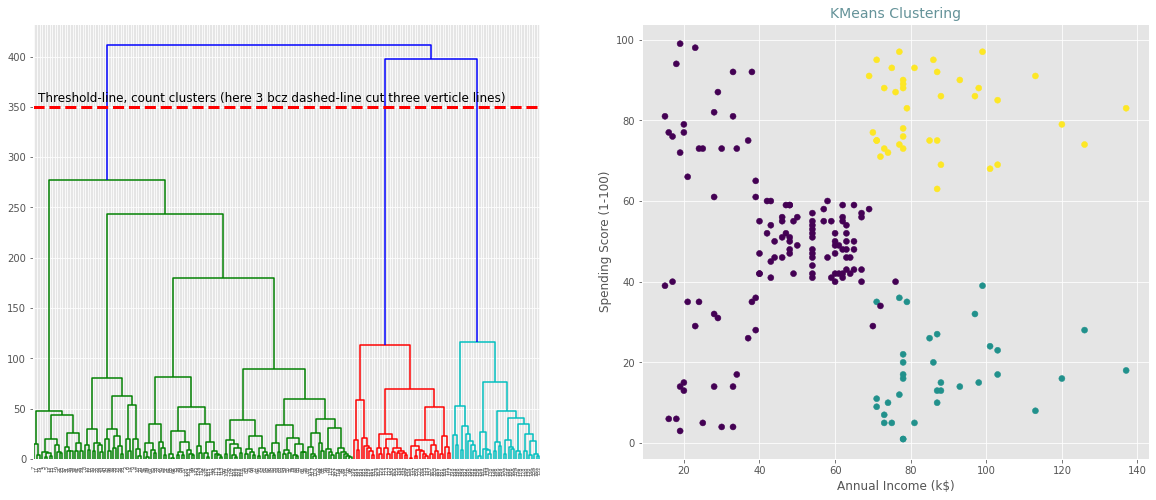

In [26]:
# Hierarchical Clustering
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),ax=subPlots[0])

##################################################################

# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
dataset['PredictedClusterID_Hierarchy']=hc.fit_predict(X)

# Plotting the predicted clusters
plt.scatter(x=dataset['Annual Income (k$)'],y=dataset['Spending Score (1-100)'],c=dataset['PredictedClusterID_Hierarchy'])
subPlots[0].axhline(y=350, ls='--', lw=3,c='red')  ## draw horizontal-line in dendrogram
subPlots[0].text(x=20,y=355,s='Threshold-line, count clusters (here 3 bcz dashed-line cut three verticle lines)',fontsize=12)  ## show text on horizontal-
plt.xlabel('Annual Income (k$)')                                                                                               ## dashed line 
plt.ylabel('Spending Score (1-100)') 
plt.title("KMeans Clustering", fontdict=dict(fontsize=14,color='#659399'));

   CustomerID  Gender  ...  PredictedClusterID_Hierarchy  PredictedClusterID_DBSCAN
0           1    Male  ...                             0                          0
1           2    Male  ...                             0                          0
2           3  Female  ...                             0                         -1
3           4  Female  ...                             0                          0
4           5  Female  ...                             0                          0

[5 rows x 8 columns]


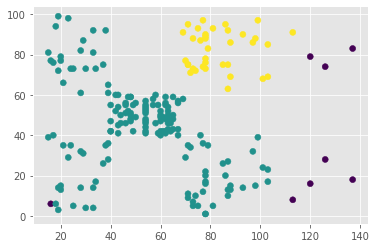

In [27]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=14, min_samples=3)

# Generating cluster id for each row using DBSCAN algorithm
# -1 indicates the point is a noise, and does not belong to any cluster
# DBSCAN automatically chooses the number of clusters based on eps and min_samples
dataset['PredictedClusterID_DBSCAN']=db.fit_predict(X)
print(dataset.head())


# Plotting the predicted clusters
plt.scatter(x=dataset['Annual Income (k$)'],y=dataset['Spending Score (1-100)'],c=dataset['PredictedClusterID_DBSCAN'])


# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.